# 1. Data Loading

### 1. Change column name

In [3]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_2010-07-17_2024-11-17.csv"
data = pd.read_csv(file_path)

# Drop the 'End Date' column
data.drop(columns=['End'], inplace=True)

# Rename 'Start Date' column to 'Date'
data.rename(columns={'Start': 'Date'}, inplace=True)

# Save the updated DataFrame to a new CSV file or overwrite the existing one
data.to_csv(r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv", index=False)

# Optional: Print the first few rows to verify the changes
print(data.head())

         Date      Open      High       Low     Close        Volume  \
0  2024-11-16  91135.39  91735.96  90131.55  90543.67  8.743721e+10   
1  2024-11-15  87681.91  91741.72  87140.65  90949.94  1.156032e+11   
2  2024-11-14  90224.20  91637.55  86938.85  87347.45  1.531463e+11   
3  2024-11-13  88144.01  93243.92  86204.37  90300.02  1.609180e+11   
4  2024-11-12  88213.99  89800.23  85175.97  88164.77  2.009708e+11   

     Market Cap  
0  1.801356e+12  
1  1.763629e+12  
2  1.773910e+12  
3  1.759013e+12  
4  1.738593e+12  


### 2. Check for missing and zero values

In [4]:
# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check for zero values in the dataset
zero_values = (data == 0).sum()

# Display the number of missing values for each column
print("Missing values per column:")
print(missing_values)

# Display the number of zero values for each column
print("\nZero values per column:")
print(zero_values)

Missing values per column:
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

Zero values per column:
Date             0
Open             0
High             0
Low              0
Close            0
Volume        1259
Market Cap       0
dtype: int64


In [5]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter rows where 'Volume' is 0
zero_volume_data = data[data['Volume'] == 0]

# Sort by Date in case it's not sorted
zero_volume_data = zero_volume_data.sort_values(by='Date')

# Create a column that indicates consecutive days with zero volume
zero_volume_data['gap'] = (zero_volume_data['Date'] - zero_volume_data['Date'].shift(1)).dt.days > 1

# Group consecutive zero-volume periods by the 'gap' column
zero_volume_data['period_id'] = zero_volume_data['gap'].cumsum()

# Group by 'period_id' and aggregate the date ranges
date_ranges = zero_volume_data.groupby('period_id')['Date'].agg(['min', 'max'])

# Display the date ranges for periods with zero volume
print("Consecutive Periods with Zero Volume:")
for index, row in date_ranges.iterrows():
    print(f"{row['min'].date()} to {row['max'].date()}")

Consecutive Periods with Zero Volume:
2010-07-17 to 2013-12-26


### 3. Replace zero values in Volume

In [6]:
# Load the data from both CSV files
data_1 = pd.read_csv(r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv")
data_2 = pd.read_csv(r"C:\Users\46704\Desktop\Bitcoin\data\Bitcoin_Historical_Data.csv")

# Convert 'Date' columns to datetime format
data_1['Date'] = pd.to_datetime(data_1['Date'])
data_2['Date'] = pd.to_datetime(data_2['Date'])

# Merge the two datasets on 'Date' column
merged_data = pd.merge(data_1, data_2[['Date', 'Vol.']], on='Date', how='left')

# Fill the zero values in the 'Volume' column with values from 'Vol.' column
# Use np.where to replace 0 values in 'Volume' with 'Vol.' values
import numpy as np
merged_data['Volume'] = np.where(merged_data['Volume'] == 0, merged_data['Vol.'], merged_data['Volume'])

# Drop the 'Vol.' column as it's no longer needed
merged_data.drop(columns=['Vol.'], inplace=True)

# Save the updated data back to the original file (use raw string to prevent unicodeescape error)
merged_data.to_csv(r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv", index=False)

# Print the first few rows to check the result
print(merged_data.head())

        Date      Open      High       Low     Close        Volume  \
0 2024-11-16  91135.39  91735.96  90131.55  90543.67  8.743721e+10   
1 2024-11-15  87681.91  91741.72  87140.65  90949.94  1.156032e+11   
2 2024-11-14  90224.20  91637.55  86938.85  87347.45  1.531463e+11   
3 2024-11-13  88144.01  93243.92  86204.37  90300.02  1.609180e+11   
4 2024-11-12  88213.99  89800.23  85175.97  88164.77  2.009708e+11   

     Market Cap  
0  1.801356e+12  
1  1.763629e+12  
2  1.773910e+12  
3  1.759013e+12  
4  1.738593e+12  


In [7]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check for zero values in the dataset
zero_values = (data == 0).sum()

# Display the number of missing values for each column
print("Missing values per column:")
print(missing_values)

# Display the number of zero values for each column
print("\nZero values per column:")
print(zero_values)

Missing values per column:
Date          0
Open          0
High          0
Low           0
Close         0
Volume        7
Market Cap    0
dtype: int64

Zero values per column:
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64


In [8]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter rows where any column has missing values
missing_data = data[data.isnull().any(axis=1)]

# Sort by Date to ensure chronological order
missing_data = missing_data.sort_values(by='Date')

# Create a column that indicates consecutive days with missing data
missing_data['gap'] = (missing_data['Date'] - missing_data['Date'].shift(1)).dt.days > 1

# Group consecutive missing data periods by the 'gap' column
missing_data['period_id'] = missing_data['gap'].cumsum()

# Group by 'period_id' and aggregate the date ranges
date_ranges = missing_data.groupby('period_id')['Date'].agg(['min', 'max'])

# Display the date ranges for periods with missing values
print("Consecutive Periods with Missing Data:")
for index, row in date_ranges.iterrows():
    print(f"{row['min'].date()} to {row['max'].date()}")

Consecutive Periods with Missing Data:
2010-07-17 to 2010-07-17
2011-06-20 to 2011-06-25


### 4. Forward fill missing values in Volume

In [9]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Forward fill missing values in the 'Volume' column
data['Volume'] = data['Volume'].fillna(method='ffill')

# Save the cleaned data with forward filled 'Volume' to a new CSV file
new_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data.to_csv(new_file_path, index=False)

# Print the first few rows of the cleaned data to check
print(data.head())

         Date      Open      High       Low     Close        Volume  \
0  2024-11-16  91135.39  91735.96  90131.55  90543.67  8.743721e+10   
1  2024-11-15  87681.91  91741.72  87140.65  90949.94  1.156032e+11   
2  2024-11-14  90224.20  91637.55  86938.85  87347.45  1.531463e+11   
3  2024-11-13  88144.01  93243.92  86204.37  90300.02  1.609180e+11   
4  2024-11-12  88213.99  89800.23  85175.97  88164.77  2.009708e+11   

     Market Cap  
0  1.801356e+12  
1  1.763629e+12  
2  1.773910e+12  
3  1.759013e+12  
4  1.738593e+12  


C:\Users\46704\AppData\Local\Temp\ipykernel_14784\2813681532.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Volume'] = data['Volume'].fillna(method='ffill')


In [10]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Display the data types of each column
print(data.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
dtype: object


In [11]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime and remove the time component (keep as datetime)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.normalize()

# Check the data types again to verify the conversion
print(data.dtypes)

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object


# 2. EDA

### 1. Statistics

In [13]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Describe the data to get summary statistics
description = data.describe()

# Display the descriptive statistics
print(description)

               Open          High           Low         Close        Volume  \
count   5237.000000   5237.000000   5237.000000   5237.000000  5.237000e+03   
mean   13242.899858  13541.866779  12935.815945  13261.394833  2.340308e+10   
std    19184.967583  19607.816168  18758.798380  19216.673391  3.577770e+10   
min        0.050000      0.050000      0.050000      0.050000  8.000000e+01   
25%      235.350000    238.541000    232.314000    235.488000  1.126997e+07   
50%     3598.148040   3664.810000   3560.543619   3601.873911  1.868310e+09   
75%    20032.728400  20376.986635  19606.735100  20050.570500  3.782280e+10   
max    91135.390000  93243.920000  90131.550000  90949.940000  2.121958e+11   

         Market Cap  
count  5.237000e+03  
mean   2.511923e+11  
std    3.720546e+11  
min    1.708032e+05  
25%    3.353254e+09  
50%    6.279285e+10  
75%    3.822196e+11  
max    1.801356e+12  


### 2. Check for outliers

In [15]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
outliers_zscore = (abs(z_scores) > 3)

# Print the rows with outliers
outlier_rows_zscore = data[outliers_zscore.any(axis=1)]
print("\nRows with outliers based on Z-score:")
print(outlier_rows_zscore)


Rows with outliers based on Z-score:
            Date          Open          High           Low         Close  \
0     2024-11-16  91135.390000  91735.960000  90131.550000  90543.670000   
1     2024-11-15  87681.910000  91741.720000  87140.650000  90949.940000   
2     2024-11-14  90224.200000  91637.550000  86938.850000  87347.450000   
3     2024-11-13  88144.010000  93243.920000  86204.370000  90300.020000   
4     2024-11-12  88213.990000  89800.230000  85175.970000  88164.770000   
...          ...           ...           ...           ...           ...   
1405  2021-01-11  38223.373713  38223.373713  30592.255264  35569.722699   
1407  2021-01-09  40577.810043  41291.465971  38819.670095  40129.000499   
1408  2021-01-08  39437.440337  41849.906402  36711.862225  40703.290535   
1409  2021-01-07  36814.681967  40164.159004  36345.635772  39493.128515   
1412  2021-01-04  32949.399464  33553.450548  29066.665438  31973.832154   

            Volume    Market Cap  
0     8.743721

In [16]:
import pandas as pd
from scipy import stats

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
outliers_zscore = (abs(z_scores) > 3)

# Create a column for outliers to mark True/False
data['Outlier'] = outliers_zscore.any(axis=1)

# Filter rows where outliers are True
outlier_data = data[data['Outlier']]

# Sort by Date to ensure chronological order
outlier_data = outlier_data.sort_values(by='Date')

# Create a column that indicates consecutive days with outliers
outlier_data['gap'] = (outlier_data['Date'] - outlier_data['Date'].shift(1)).dt.days > 1

# Group consecutive outlier data periods by the 'gap' column
outlier_data['period_id'] = outlier_data['gap'].cumsum()

# Group by 'period_id' and aggregate the date ranges
outlier_date_ranges = outlier_data.groupby('period_id')['Date'].agg(['min', 'max'])

# Display the date ranges for periods with outliers
print("Consecutive Periods with Outliers:")
for index, row in outlier_date_ranges.iterrows():
    print(f"{row['min'].date()} to {row['max'].date()}")

Consecutive Periods with Outliers:
2021-01-04 to 2021-01-04
2021-01-07 to 2021-01-09
2021-01-11 to 2021-01-12
2021-01-22 to 2021-01-22
2021-01-29 to 2021-01-30
2021-02-09 to 2021-02-09
2021-02-12 to 2021-02-14
2021-02-17 to 2021-02-17
2021-02-20 to 2021-02-24
2021-02-26 to 2021-02-26
2021-03-11 to 2021-03-13
2021-03-25 to 2021-03-25
2021-04-13 to 2021-04-19
2021-04-23 to 2021-04-23
2021-05-13 to 2021-05-13
2021-05-19 to 2021-05-20
2021-12-02 to 2021-12-02
2021-12-04 to 2021-12-07
2021-12-09 to 2021-12-09
2022-05-12 to 2022-05-13
2022-11-09 to 2022-11-10
2023-10-24 to 2023-10-24
2024-01-04 to 2024-01-05
2024-02-29 to 2024-02-29
2024-03-06 to 2024-03-06
2024-03-11 to 2024-03-15
2024-03-26 to 2024-04-01
2024-04-08 to 2024-04-27
2024-04-30 to 2024-05-02
2024-05-20 to 2024-05-22
2024-06-04 to 2024-06-10
2024-08-05 to 2024-08-06
2024-10-29 to 2024-11-02
2024-11-06 to 2024-11-16


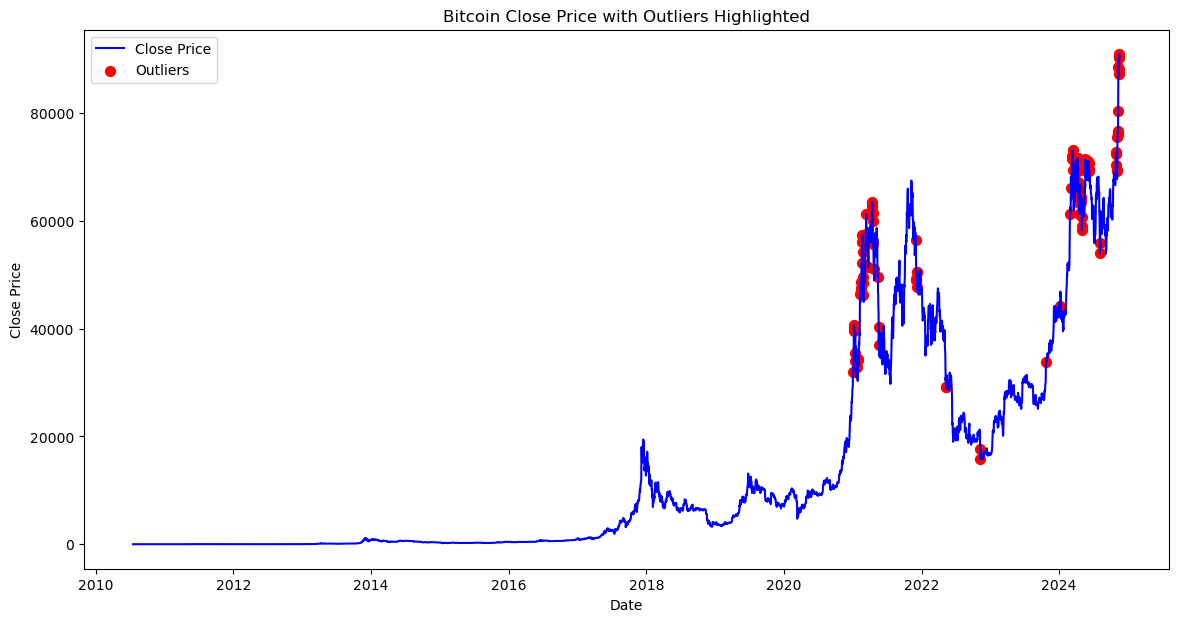

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate Z-scores for numeric columns
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))

# Identify outliers based on Z-score threshold (>3 or <-3)
outliers_zscore = (abs(z_scores) > 3)
outlier_rows_zscore = data[outliers_zscore.any(axis=1)]

# Extract the dates of the outliers for plotting
outlier_dates = outlier_rows_zscore['Date']
outlier_close_prices = outlier_rows_zscore['Close']

# Plot Close price
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')

# Plot outliers
plt.scatter(outlier_dates, outlier_close_prices, color='red', label='Outliers', marker='o', s=50)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bitcoin Close Price with Outliers Highlighted')
plt.legend()

# Show plot
plt.show()

### 3. Correlation Matrix

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap',
       'Outlier'],
      dtype='object')


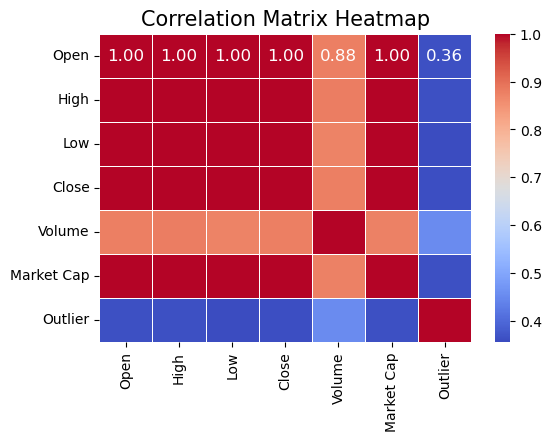

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check column names in the dataset
print(data.columns)

# Drop the 'Date' column and 'Outlier' column if they exist
if 'Date' in data.columns:
    data_without_date = data.drop(columns=['Date'])
else:
    print("The 'Date' column is not found. Please verify the column name.")


# Compute the correlation matrix
corr_matrix = data_without_date.corr()


# Plot the heatmap of the correlation matrix with values inside each box
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, annot_kws={"size": 12})
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.show()

# 3. Feature Engineering

### 1. Lagged Features

In [19]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data.csv"
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date in ascending order (oldest to newest)
data = data.sort_values(by='Date', ascending=True)

# Add 'Day_of_Week', 'Month', and 'Year' columns
data['Day_of_Week'] = data['Date'].dt.weekday  # Day of the week as a number (0 = Monday, 6 = Sunday)
data['Month'] = data['Date'].dt.month  # Extracts the month as an integer (1 for January, 2 for February, etc.)
data['Year'] = data['Date'].dt.year  # Extracts the year

# Adding the lagged close and market cap (shifted by 1)
data['Lagged_Close1'] = data['Close'].shift(1)
data['Lagged_Close2'] = data['Close'].shift(2)
data['Lagged_Close3'] = data['Close'].shift(3)
data['Lagged_Close5'] = data['Close'].shift(5)
data['Lagged_Close10'] = data['Close'].shift(10)

data['Lagged_Market_Cap'] = data['Market Cap'].shift(1)
data['Lagged_Volume'] = data['Volume'].shift(1)

# Adding average price and VWAP (Volume Weighted Average Price)
data['Avg_Price'] = (data['Open'] + data['Close'] + data['Low'] + data['High']) / 4
data['Lagged_Avg_Price'] = data['Avg_Price'].shift(1)
data['Lagged_VWAP'] = (data['Lagged_Avg_Price'] * data['Lagged_Volume']) / data['Lagged_Volume']

# Calculating the Open-Close Range
data['Open_Close_Range'] = data['Open'] - data['Close']
data['Lagged_Open_Close_Range'] = data['Open_Close_Range'].shift(1)

# Calculating the Open-Close Range
data['High_Low_Range'] = data['High'] - data['Low']
data['Lagged_High_Low_Range'] = data['High_Low_Range'].shift(1)

# Save the updated data as a new file
new_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"  # New file path

# Saving only the original columns plus the newly created ones
columns_to_save = ['Date', 'Day_of_Week', 'Month', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 
                   'Lagged_Close1', 'Lagged_Close2', 'Lagged_Close3', 'Lagged_Close5', 'Lagged_Close10', 'Lagged_Market_Cap', 'Lagged_Volume', 
                   'Lagged_VWAP', 'Lagged_Open_Close_Range', 'Lagged_High_Low_Range']

                   
# Saving the updated dataframe to the new file, keeping original columns and adding the new ones
data[columns_to_save].to_csv(new_file_path, index=False)

# Print a message indicating the file was updated
print(f"Data with new columns saved to {new_file_path}")

Data with new columns saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv


### 2. Technical Indicators

In [20]:
# Load the CSV file
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date in ascending order (oldest to newest)
data = data.sort_values(by='Date', ascending=True)

# Calculate the SMAs (10 and 50-day moving averages)
data['Lagged_SMA_10'] = data['Lagged_Close1'].rolling(window=10).mean()
data['Lagged_SMA_50'] = data['Lagged_Close1'].rolling(window=50).mean()

# Calculate the difference between SMA_10 and SMA_50
data['Lagged_SMA_diff'] = data['Lagged_SMA_10'] - data['Lagged_SMA_50']

# Fill the SMAs and SMA_diff using backfill to avoid NaN values
data[['Lagged_SMA_10', 'Lagged_SMA_50', 'Lagged_SMA_diff']] = data[['Lagged_SMA_10', 'Lagged_SMA_50', 'Lagged_SMA_diff']].bfill()

# Initialize Bullish and Bearish trend columns to False
data['Bullish_Trend'] = False
data['Bearish_Trend'] = False
data['Bullish_Signal'] = False
data['Bearish_Signal'] = False

# Set Bullish_Signal and Bearish_Signal to False for the first 49 days, as SMA_50 is not available yet
data.loc[:48, 'Bullish_Signal'] = False
data.loc[:48, 'Bearish_Signal'] = False
data.loc[:48, 'Bullish_Trend'] = False
data.loc[:48, 'Bearish_Trend'] = False

# Calculate Bullish and Bearish Signals after 49th day (when SMA_50 is valid)
for i in range(50, len(data)):  # Start from index 50 since we need at least 50 days to calculate SMA_50
    # Bullish when SMA_10 > SMA_50, Bearish when SMA_10 < SMA_50
    if data['Lagged_SMA_10'][i] > data['Lagged_SMA_50'][i]:
        data.at[i, 'Bullish_Signal'] = True
    elif data['Lagged_SMA_10'][i] < data['Lagged_SMA_50'][i]:
        data.at[i, 'Bearish_Signal'] = True

    # Mark the start of trends (when crossover happens)
    if data['Lagged_SMA_10'][i] > data['Lagged_SMA_50'][i] and data['Lagged_SMA_10'][i-1] <= data['Lagged_SMA_50'][i-1]:
        data.at[i, 'Bullish_Trend'] = True
    elif data['Lagged_SMA_10'][i] < data['Lagged_SMA_50'][i] and data['Lagged_SMA_10'][i-1] >= data['Lagged_SMA_50'][i-1]:
        data.at[i, 'Bearish_Trend'] = True

# Add condition to exclude signals with durations less than 30 days
data['Bullish'] = False
data['Bearish'] = False

# Loop through the data to calculate the duration of each crossover and filter out short trends
for i in range(1, len(data)):
    if data['Bullish_Trend'][i]:
        # Find how long the trend lasts
        end_index = i + 1
        while end_index < len(data) and data['Lagged_SMA_10'][end_index] > data['Lagged_SMA_50'][end_index]:
            end_index += 1
        # Mark as valid if the trend lasts for at least 10 days
        if (end_index - i) >= 10:
            data.at[i, 'Bullish'] = True
    if data['Bearish_Trend'][i]:
        # Find how long the trend lasts
        end_index = i + 1
        while end_index < len(data) and data['Lagged_SMA_10'][end_index] < data['Lagged_SMA_50'][end_index]:
            end_index += 1
        # Mark as valid if the trend lasts for at least 10 days
        if (end_index - i) >= 10:
            data.at[i, 'Bearish'] = True


# Save the updated data as a new file
new_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"  # New file path

# Saving only the original columns plus the newly created ones
columns_to_save = ['Date', 'Day_of_Week', 'Month', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 
                   'Lagged_Close1', 'Lagged_Close2', 'Lagged_Close3', 'Lagged_Close5', 'Lagged_Close10', 'Lagged_Market_Cap', 'Lagged_Volume', 
                   'Lagged_VWAP', 'Lagged_Open_Close_Range', 'Lagged_High_Low_Range' , 'Lagged_SMA_10', 'Lagged_SMA_50', 'Lagged_SMA_diff', 
                   'Bullish', 'Bearish', 'Bullish_Signal', 'Bearish_Signal']

                   
# Saving the updated dataframe to the new file, keeping original columns and adding the new ones
data[columns_to_save].to_csv(new_file_path, index=False)

# Print a message indicating the file was updated
print(f"Data with new columns saved to {new_file_path}")

Data with new columns saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv


In [21]:
# Load the CSV file
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date in ascending order (oldest to newest)
data = data.sort_values(by='Date', ascending=True)

# Calculate RSI (14-day period)
delta = data['Lagged_Close1'].diff()  # Difference between consecutive closing prices
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()  # Average gain
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()  # Average loss
rs = gain / loss  # Relative Strength
data['Lagged_RSI'] = 100 - (100 / (1 + rs))

# Save the updated data as a new file
new_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"  # New file path

# Saving only the original columns plus the newly created ones
columns_to_save = ['Date', 'Day_of_Week', 'Month', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 
                   'Lagged_Close1', 'Lagged_Close2', 'Lagged_Close3', 'Lagged_Close5', 'Lagged_Close10', 'Lagged_Market_Cap', 'Lagged_Volume', 
                   'Lagged_VWAP', 'Lagged_Open_Close_Range', 'Lagged_High_Low_Range' , 'Lagged_SMA_10', 'Lagged_SMA_50', 'Lagged_SMA_diff', 
                   'Bullish', 'Bearish', 'Bullish_Signal', 'Bearish_Signal', 'Lagged_RSI']

                   
# Saving the updated dataframe to the new file, keeping original columns and adding the new ones
data[columns_to_save].to_csv(new_file_path, index=False)

# Print a message indicating the file was updated
print(f"Data with new columns saved to {new_file_path}")

Data with new columns saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv


In [22]:
# Load the CSV file
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date in ascending order (oldest to newest)
data = data.sort_values(by='Date', ascending=True)

# Calculate MACD (12-day EMA - 26-day EMA) and Signal Line (9-day EMA of MACD)
ema_12 = data['Lagged_Close1'].ewm(span=12, adjust=False).mean()
ema_26 = data['Lagged_Close1'].ewm(span=26, adjust=False).mean()
data['Lagged_MACD'] = ema_12 - ema_26  # MACD line
data['Lagged_Signal_Line'] = data['Lagged_MACD'].ewm(span=9, adjust=False).mean()  # Signal line

# Initialize new columns for crossovers and validity
data['Lagged_MACD_Cross_Above'] = False
data['Lagged_MACD_Cross_Below'] = False

# Check for crossovers and validate if MACD stays above or below for 10 consecutive days
for i in range(1, len(data)-5):
    # Check for bullish crossover (MACD crosses above Signal Line)
    if data['Lagged_MACD'][i] > data['Lagged_Signal_Line'][i] and data['Lagged_MACD'][i - 1] <= data['Lagged_Signal_Line'][i - 1]:
        # Check if MACD stays above Signal Line for the next 10 days
        if all(data['Lagged_MACD'][i:i+5] > data['Lagged_Signal_Line'][i:i+5]):
            data.loc[i, 'Lagged_MACD_Cross_Above'] = True

    # Check for bearish crossover (MACD crosses below Signal Line)
    if data['Lagged_MACD'][i] < data['Lagged_Signal_Line'][i] and data['Lagged_MACD'][i - 1] >= data['Lagged_Signal_Line'][i - 1]:
        # Check if MACD stays below Signal Line for the next 10 days
        if all(data['Lagged_MACD'][i:i+5] < data['Lagged_Signal_Line'][i:i+5]):
            data.loc[i, 'Lagged_MACD_Cross_Below'] = True

# Save the updated data as a new file
new_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"  # New file path

# Saving only the original columns plus the newly created ones
columns_to_save = ['Date', 'Day_of_Week', 'Month', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 
                   'Lagged_Close1', 'Lagged_Close2', 'Lagged_Close3', 'Lagged_Close5', 'Lagged_Close10', 'Lagged_Market_Cap', 'Lagged_Volume', 
                   'Lagged_VWAP', 'Lagged_Open_Close_Range', 'Lagged_High_Low_Range' , 'Lagged_SMA_10', 'Lagged_SMA_50', 'Lagged_SMA_diff', 
                   'Bullish', 'Bearish', 'Bullish_Signal', 'Bearish_Signal', 'Lagged_RSI', 'Lagged_MACD', 'Lagged_Signal_Line', 
                    'Lagged_MACD_Cross_Below', 'Lagged_MACD_Cross_Above']

                   
# Saving the updated dataframe to the new file, keeping original columns and adding the new ones
data[columns_to_save].to_csv(new_file_path, index=False)

# Print a message indicating the file was updated
print(f"Data with new columns saved to {new_file_path}")

Data with new columns saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv


In [23]:
# Load the CSV file
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date in ascending order (oldest to newest)
data = data.sort_values(by='Date', ascending=True)

window_size = 10
data['Lagged_Support'] = data['Lagged_Close1'].rolling(window=window_size, min_periods=1).min()
data['Lagged_Resistance'] = data['Lagged_Close1'].rolling(window=window_size, min_periods=1).max()

# Save the updated data as a new file
new_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"  # New file path


# Saving only the original columns plus the newly created ones
columns_to_save = ['Date', 'Day_of_Week', 'Month', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 
                   'Lagged_Close1', 'Lagged_Close2', 'Lagged_Close3', 'Lagged_Close5', 'Lagged_Close10', 'Lagged_Market_Cap', 'Lagged_Volume', 
                   'Lagged_VWAP', 'Lagged_Open_Close_Range', 'Lagged_High_Low_Range' , 'Lagged_SMA_10', 'Lagged_SMA_50', 'Lagged_SMA_diff', 
                   'Bullish', 'Bearish', 'Bullish_Signal', 'Bearish_Signal', 'Lagged_RSI', 'Lagged_MACD', 'Lagged_Signal_Line', 
                    'Lagged_MACD_Cross_Below', 'Lagged_MACD_Cross_Above', 'Lagged_Support', 'Lagged_Resistance']
                   
# Saving the updated dataframe to the new file, keeping original columns and adding the new ones
data[columns_to_save].to_csv(new_file_path, index=False)

# Print a message indicating the file was updated
print(f"Data with new columns saved to {new_file_path}")

Data with new columns saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv


In [24]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"
data = pd.read_csv(file_path)

# Calculate the Bollinger Bands
window = 20  # Typically, 20-day window for Bollinger Bands

# Calculate the Simple Moving Average (SMA) for the middle band
data['Lagged_Middle_Band'] = data['Lagged_Close1'].rolling(window=window).mean()

# Calculate the rolling standard deviation for the upper and lower bands
data['Lagged_Rolling_STD'] = data['Lagged_Close1'].rolling(window=window).std()

# Calculate the Upper and Lower Bands
data['Lagged_Upper_Band'] = data['Lagged_Middle_Band'] + (2 * data['Lagged_Rolling_STD'])
data['Lagged_Lower_Band'] = data['Lagged_Middle_Band'] - (2 * data['Lagged_Rolling_STD'])

# Calculate the Band Width (difference between the Upper and Lower Bands)
data['Lagged_Band_Width'] = data['Lagged_Upper_Band'] - data['Lagged_Lower_Band']

# Create the composite Bollinger Bands indicator
data['Lagged_Bollinger_Indicator'] = (data['Lagged_Close1'] - data['Lagged_Middle_Band']) / data['Lagged_Band_Width']

# Saving only the original columns plus the newly created ones
columns_to_save = ['Date', 'Day_of_Week', 'Month', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 
                   'Lagged_Close1', 'Lagged_Close2', 'Lagged_Close3', 'Lagged_Close5', 'Lagged_Close10', 'Lagged_Market_Cap', 'Lagged_Volume', 
                   'Lagged_VWAP', 'Lagged_Open_Close_Range', 'Lagged_High_Low_Range' , 'Lagged_SMA_10', 'Lagged_SMA_50', 'Lagged_SMA_diff', 
                   'Bullish', 'Bearish', 'Bullish_Signal', 'Bearish_Signal', 'Lagged_RSI', 'Lagged_MACD', 'Lagged_Signal_Line', 
                    'Lagged_MACD_Cross_Below', 'Lagged_MACD_Cross_Above', 'Lagged_Support', 'Lagged_Resistance', 'Lagged_Upper_Band',
                    'Lagged_Middle_Band', 'Lagged_Lower_Band', 'Lagged_Band_Width', 'Lagged_Bollinger_Indicator']
                   
# Saving the updated dataframe to the new file, keeping original columns and adding the new ones
data[columns_to_save].to_csv(new_file_path, index=False)

# Print a message indicating the file was updated
print(f"Data with new columns saved to {new_file_path}")

Data with new columns saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv


In [25]:
import pandas as pd

# Load the dataset from the file path
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"
data = pd.read_csv(file_path)

# Check for missing values in every column
missing_values = data.isnull().sum()  # Count missing values in each column

# Print missing values for all columns
print("Missing values in each column:")
print(missing_values[missing_values > 0])  # Show columns with missing values only
print("\nTotal missing values in the dataset:", missing_values.sum())

# Save the output to a file if needed
print("Missing values summary saved to missing_values_summary.csv")

Missing values in each column:
Lagged_Close1                  1
Lagged_Close2                  2
Lagged_Close3                  3
Lagged_Close5                  5
Lagged_Close10                10
Lagged_Market_Cap              1
Lagged_Volume                  1
Lagged_VWAP                    1
Lagged_Open_Close_Range        1
Lagged_High_Low_Range          1
Lagged_RSI                    13
Lagged_MACD                    1
Lagged_Signal_Line             1
Lagged_Support                 1
Lagged_Resistance              1
Lagged_Upper_Band             20
Lagged_Middle_Band            20
Lagged_Lower_Band             20
Lagged_Band_Width             20
Lagged_Bollinger_Indicator    20
dtype: int64

Total missing values in the dataset: 143
Missing values summary saved to missing_values_summary.csv


In [26]:
import pandas as pd

# Load the dataset from the file path
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"  # Adjust the path if needed
data = pd.read_csv(file_path)

# Backfill missing values for all columns in the DataFrame
data.fillna(method='bfill', inplace=True)

# Check if there are still any missing values in any column
print("Missing values after backfill (should be zero):")
print(data.isnull().sum())

# Save the updated DataFrame to a new CSV file
new_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"  # New file path
data.to_csv(new_file_path, index=False)

# Print a message indicating the file was updated
print(f"Data with backfilled values saved to {new_file_path}")

Missing values after backfill (should be zero):
Date                          0
Day_of_Week                   0
Month                         0
Year                          0
Open                          0
High                          0
Low                           0
Close                         0
Volume                        0
Market Cap                    0
Lagged_Close1                 0
Lagged_Close2                 0
Lagged_Close3                 0
Lagged_Close5                 0
Lagged_Close10                0
Lagged_Market_Cap             0
Lagged_Volume                 0
Lagged_VWAP                   0
Lagged_Open_Close_Range       0
Lagged_High_Low_Range         0
Lagged_SMA_10                 0
Lagged_SMA_50                 0
Lagged_SMA_diff               0
Bullish                       0
Bearish                       0
Bullish_Signal                0
Bearish_Signal                0
Lagged_RSI                    0
Lagged_MACD                   0
Lagged_Signal_Line      

C:\Users\46704\AppData\Local\Temp\ipykernel_14784\1411485582.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


### 3. Correlation Matrix

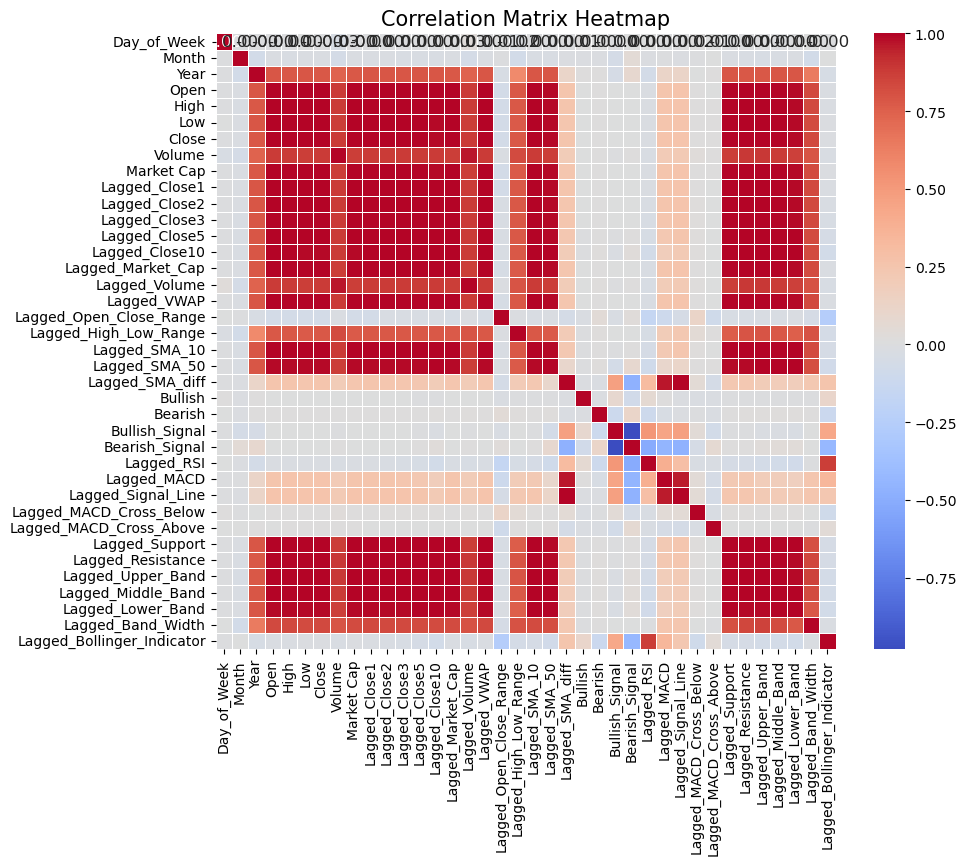

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"
data = pd.read_csv(file_path)

# Drop the 'Date' column and 'Outlier' column if they exist
if 'Date' in data.columns:
    data_without_date = data.drop(columns=['Date'])
else:
    print("The 'Date' column is not found. Please verify the column name.")


# Compute the correlation matrix
corr_matrix = data_without_date.corr()


# Plot the heatmap of the correlation matrix with values inside each box
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, annot_kws={"size": 12})
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.show()

# 4. Data scaling

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib  # Import joblib to save the scaler

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"
df = pd.read_csv(file_path)

# Specify the columns to scale
columns_to_scale = ['Lagged_Close1', 'Lagged_Open_Close_Range']

# Initialize the MinMaxScaler for the features you want to scale
feature_scaler = MinMaxScaler()

# Apply Min-Max scaling to only the specified columns (features)
df[columns_to_scale] = feature_scaler.fit_transform(df[columns_to_scale])

# Check the first few rows to confirm the scaling
print(df[columns_to_scale].head())

# Specify the target column (Close)
target_column = 'Close'

# Initialize the MinMaxScaler for the target column
target_scaler = MinMaxScaler()

# Apply Min-Max scaling to the 'Close' column (target)
df[target_column] = target_scaler.fit_transform(df[[target_column]])

# Check the first few rows to confirm the scaling
print(df[[target_column]].head())

# Save the scaled data (with scaled features and target) to a new CSV file
scaled_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv"
df.to_csv(scaled_file_path, index=False)

# Save the scaler for the 'Close' column to a .pkl file using joblib (not the feature scaler)
scaler_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_scaler_close.pkl"
joblib.dump(target_scaler, scaler_file_path)

# Optionally, display a message that the scaling was successful and the scaler was saved
print(f"Data has been scaled and saved to {scaled_file_path}")
print(f"Scaler for the 'Close' price has been saved to {scaler_file_path}")

   Lagged_Close1  Lagged_Open_Close_Range
0   0.000000e+00                 0.567857
1   0.000000e+00                 0.567857
2   3.936233e-07                 0.567857
3   3.386480e-07                 0.567857
4   2.715781e-07                 0.567857
          Close
0  0.000000e+00
1  3.936233e-07
2  3.386480e-07
3  2.715781e-07
4  3.210559e-07
Data has been scaled and saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv
Scaler for the 'Close' price has been saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_scaler_close.pkl


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv"
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format (if it's not already)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Select columns to scale (exclude 'Date')
columns_to_scale = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Check if 'Date' is in columns_to_scale and remove it if it is
if 'Date' in columns_to_scale:
    columns_to_scale.remove('Date')

# Exclude 'Lagged_Close1' and 'Lagged_Open_Close_Range' from scaling
columns_to_scale = [col for col in columns_to_scale if col not in ['Lagged_Close1', 'Lagged_Open_Close_Range']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Save the updated DataFrame to a new CSV file
new_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv"
data.to_csv(new_file_path, index=False)

# Print a message indicating the file was updated
print(f"Data with scaled features (except 'Date', 'Lagged_Close1', and 'Lagged_Open_Close_Range') saved to {new_file_path}")

Data with scaled features (except 'Date', 'Lagged_Close1', and 'Lagged_Open_Close_Range') saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv


In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_updated.csv"
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format (if it's not already)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Select columns to scale (exclude 'Date')
columns_to_scale = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Check if 'Date' is in columns_to_scale and remove it if it is
if 'Date' in columns_to_scale:
    columns_to_scale.remove('Date')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Save the updated DataFrame to a new CSV file
new_file_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv"
data.to_csv(new_file_path, index=False)

# Print a message indicating the file was updated
print(f"Data with scaled features (except 'Date') saved to {new_file_path}")

Data with scaled features (except 'Date') saved to C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv


# 5. Model Training

### 1. Grid Search

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ParameterGrid
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf
import os

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Path to the dataset
data_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv"

# Load data
data = pd.read_csv(data_path)

# Define features and target variable
features = data[['Lagged_Close1', 'Lagged_Open_Close_Range']]
target = data['Close']

# Convert to numeric and handle NaNs
features = features.apply(pd.to_numeric, errors='coerce')
target = pd.to_numeric(target, errors='coerce')

# Drop any rows with NaN values
features.dropna(inplace=True)
target = target[features.index]

# Create dataset function to predict t+1 only
def create_dataset(X, y, time_step=10):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):
        Xs.append(X.iloc[i:(i + time_step)].values)
        ys.append([y.iloc[i + time_step]])  # Predict t+1
    return np.array(Xs), np.array(ys)

# Define time step and create dataset
time_step = 10
X, y = create_dataset(features, target, time_step)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshape inputs to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], time_step, -1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], time_step, -1).astype('float32')
y_train, y_test = y_train.astype('float32'), y_test.astype('float32')

# Define the parameter grid for grid search
param_grid = {
    'lstm_units': [30, 50, 70],
    'learning_rate': [0.0001, 0.001, 0.01],
    'dropout_rate': [0.0, 0.2, 0.3],
    'l1_reg': [0.0, 0.001, 0.01],
    'l2_reg': [0.0, 0.001, 0.01],
    'activation': ['tanh', 'relu'],
    'batch_size': [16, 32]
}

# Initialize a list to store the results (top 5 models)
results = []

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Iterate over each combination of hyperparameters
for params in ParameterGrid(param_grid):
    print(f"Training with parameters: {params}")
    
    # Build and compile the model with the current parameters
    model = Sequential()
    model.add(Input(shape=(time_step, X_train.shape[2])))
    model.add(LSTM(
        units=params['lstm_units'], 
        activation=params['activation'], 
        dropout=params['dropout_rate'], 
        kernel_regularizer=l1_l2(l1=params['l1_reg'], l2=params['l2_reg'])
    ))
    model.add(Dense(1))  # Output layer for t+1 prediction
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss='mean_squared_error')
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=150,
        batch_size=params['batch_size'],
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Evaluate the model on the test set
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test loss: {test_loss}")
    
    # Store the results for this model
    results.append({'params': params, 'test_loss': test_loss, 'model': model})

# Sort the results by test loss to get the top 5 models
top_5_results = sorted(results, key=lambda x: x['test_loss'])[:5]

# Output the top 5 models and their parameters
print("\nTop 5 Models:")
for idx, result in enumerate(top_5_results, 1):
    print(f"\nModel {idx}:")
    print(f"Parameters: {result['params']}")
    print(f"Test loss: {result['test_loss']}")

    # Save the best model (optional)
    model_save_path = f"C:/Users/46704/Desktop/Bitcoin/best_bitcoin_model_{idx}.h5"
    os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
    result['model'].save(model_save_path)
    print(f"Best model {idx} saved at {model_save_path}")

### 2. Model with 1 variable Lagged_Close1

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Path to the dataset
data_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv"

# Load data
data = pd.read_csv(data_path)

# Define features and target variable
features = data[['Lagged_Close1']]
target = data['Close']

# Convert to numeric and handle NaNs
features = features.apply(pd.to_numeric, errors='coerce')
target = pd.to_numeric(target, errors='coerce')

# Drop any rows with NaN values
features.dropna(inplace=True)
target = target[features.index]

# Create dataset function to predict t+1 only
def create_dataset(X, y, time_step=10):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):  # Predicting only t+1
        Xs.append(X.iloc[i:(i + time_step)].values)
        ys.append([y.iloc[i + time_step]])  # Predict t+1
    return np.array(Xs), np.array(ys)

# Define time step and create dataset
time_step = 10
X, y = create_dataset(features, target, time_step)

# Split data into train (80%), validation (10%), and test (10%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, shuffle=False)

# Reshape inputs to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], time_step, -1)
X_val = X_val.reshape(X_val.shape[0], time_step, -1)
X_test = X_test.reshape(X_test.shape[0], time_step, -1)

# Ensure data type is float32 for Keras model
X_train, X_val, X_test = X_train.astype('float32'), X_val.astype('float32'), X_test.astype('float32')
y_train, y_val, y_test = y_train.astype('float32'), y_val.astype('float32'), y_test.astype('float32')

# Function to create and train model with specified parameters
def create_and_train_model(X_train, y_train, X_val, y_val, 
                           lstm_units=30, learning_rate=0.0001, 
                           batch_size=16, epochs=150, dropout_rate=0.0, 
                           l1_reg=0.0, l2_reg=0.0, activation='tanh'):
    
    model = Sequential()
    model.add(Input(shape=(time_step, X_train.shape[2])))
    model.add(LSTM(lstm_units, activation=activation, dropout=dropout_rate, 
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(Dense(1))  # Output layer with 1 unit for t+1 prediction
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train model
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)
    
    return model, history

# Set hyperparameters
lstm_units = 30
learning_rate = 0.0001
batch_size = 16
epochs = 150
dropout_rate = 0.0
l1_reg = 0.0
l2_reg = 0.0
activation = 'tanh'

# Train model
model, history = create_and_train_model(X_train, y_train, X_val, y_val, 
                                        lstm_units=lstm_units, learning_rate=learning_rate, 
                                        batch_size=batch_size, epochs=epochs, 
                                        dropout_rate=dropout_rate, l1_reg=l1_reg, l2_reg=l2_reg, 
                                        activation=activation)

# Save the model after initial training
model_save_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_model_t1.h5"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)

# Evaluate the model on test set
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')

# Generate predictions on test set
test_predictions = model.predict(X_test)

# Display predictions for the first few samples
print("Predikterade värden (de första 5):", test_predictions[:5])
print("Faktiska värden (de första 5):", y_test[:5])

# Calculate performance metrics on test set
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = math.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Epoch 1/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0342 - val_loss: 0.0345
Epoch 2/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0102 - val_loss: 0.0015
Epoch 3/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7277e-04 - val_loss: 9.4272e-04
Epoch 4/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9816e-04 - val_loss: 8.5941e-04
Epoch 5/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7393e-04 - val_loss: 7.9347e-04
Epoch 6/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5248e-04 - val_loss: 7.4298e-04
Epoch 7/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3403e-04 - val_loss: 7.0568e-04
Epoch 8/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1852e-04 - val_loss: 6.7941e-04
Epoch 9/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0570e-04 - val_loss: 6.6215e-04
Epoch 10/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9524e-04 - val_loss: 6.5203e-04
Epoch 11/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - loss: 3.1984e-04
Test Loss: 0.0006401515565812588
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predikterade värden (de första 5): [[0.29390708]
 [0.2922066 ]
 [0.29107547]
 [0.29069248]
 [0.2863764 ]]
Faktiska värden (de första 5): [[0.2846352 ]
 [0.28488192]
 [0.2761945 ]
 [0.28131294]
 [0.28963795]]
Mean Absolute Error (MAE): 0.017438771203160286
Mean Squared Error (MSE): 0.0006401515565812588
Root Mean Squared Error (RMSE): 0.02530121650397978


### 3. Model with 2 variables Lagged_Close1 and Lagged_Open_Close_Range

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Path to the dataset
data_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv"

# Load data
data = pd.read_csv(data_path)

# Define features and target variable
features = data[['Lagged_Close1', 'Lagged_Open_Close_Range']]
target = data['Close']

# Convert to numeric and handle NaNs
features = features.apply(pd.to_numeric, errors='coerce')
target = pd.to_numeric(target, errors='coerce')

# Drop any rows with NaN values
features.dropna(inplace=True)
target = target[features.index]

# Create dataset function to predict t+1 only
def create_dataset(X, y, time_step=10):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):  # Predicting only t+1
        Xs.append(X.iloc[i:(i + time_step)].values)
        ys.append([y.iloc[i + time_step]])  # Predict t+1
    return np.array(Xs), np.array(ys)

# Define time step and create dataset
time_step = 10
X, y = create_dataset(features, target, time_step)

# Split data into train (80%), validation (10%), and test (10%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, shuffle=False)

# Reshape inputs to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], time_step, -1)
X_val = X_val.reshape(X_val.shape[0], time_step, -1)
X_test = X_test.reshape(X_test.shape[0], time_step, -1)

# Ensure data type is float32 for Keras model
X_train, X_val, X_test = X_train.astype('float32'), X_val.astype('float32'), X_test.astype('float32')
y_train, y_val, y_test = y_train.astype('float32'), y_val.astype('float32'), y_test.astype('float32')

# Function to create and train model with specified parameters
def create_and_train_model(X_train, y_train, X_val, y_val, 
                           lstm_units=30, learning_rate=0.0001, 
                           batch_size=16, epochs=150, dropout_rate=0.0, 
                           l1_reg=0.0, l2_reg=0.0, activation='tanh'):
    
    model = Sequential()
    model.add(Input(shape=(time_step, X_train.shape[2])))
    model.add(LSTM(lstm_units, activation=activation, dropout=dropout_rate, 
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(Dense(1))  # Output layer with 1 unit for t+1 prediction
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train model
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)
    
    return model, history

# Set hyperparameters
lstm_units = 30
learning_rate = 0.0001
batch_size = 16
epochs = 150
dropout_rate = 0.0
l1_reg = 0.0
l2_reg = 0.0
activation = 'tanh'

# Train model
model, history = create_and_train_model(X_train, y_train, X_val, y_val, 
                                        lstm_units=lstm_units, learning_rate=learning_rate, 
                                        batch_size=batch_size, epochs=epochs, 
                                        dropout_rate=dropout_rate, l1_reg=l1_reg, l2_reg=l2_reg, 
                                        activation=activation)

# Save the model after initial training
model_save_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_model_t1_2var.h5"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)

# Evaluate the model on test set
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')

# Generate predictions on test set
test_predictions = model.predict(X_test)

# Display predictions for the first few samples
print("Predikterade värden (de första 5):", test_predictions[:5])
print("Faktiska värden (de första 5):", y_test[:5])

# Calculate performance metrics on test set
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = math.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Epoch 1/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0248 - val_loss: 0.0194
Epoch 2/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 6.5173e-04
Epoch 3/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7755e-04 - val_loss: 6.4430e-04
Epoch 4/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6956e-04 - val_loss: 6.3387e-04
Epoch 5/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6200e-04 - val_loss: 6.2225e-04
Epoch 6/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5447e-04 - val_loss: 6.0801e-04
Epoch 7/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4690e-04 - val_loss: 5.9132e-04
Epoch 8/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3918e-04 - val_loss: 5.7305e-04
Epoch 9/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3124e-04 - val_loss: 5.5387e-04
Epoch 10/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2310e-04 - val_loss: 5.3415e-04
Epoch 11/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0454e-04  
Test Loss: 0.0006304043927229941
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predikterade värden (de första 5): [[0.28918776]
 [0.289764  ]
 [0.2887528 ]
 [0.28872177]
 [0.28071806]]
Faktiska värden (de första 5): [[0.2846352 ]
 [0.28488192]
 [0.2761945 ]
 [0.28131294]
 [0.28963795]]
Mean Absolute Error (MAE): 0.017104018479585648
Mean Squared Error (MSE): 0.0006304043927229941
Root Mean Squared Error (RMSE): 0.02510785519957836


### 4. Model with Data Augmentation

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Path to the dataset
data_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv"

# Load data
data = pd.read_csv(data_path)

# Define features and target variable
features = data[['Lagged_Close1', 'Lagged_Open_Close_Range']]
target = data['Close']

# Convert to numeric and handle NaNs
features = features.apply(pd.to_numeric, errors='coerce')
target = pd.to_numeric(target, errors='coerce')

# Drop any rows with NaN values
features.dropna(inplace=True)
target = target[features.index]

# Create dataset function to predict t+1 only
def create_dataset(X, y, time_step=10):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):  # Predicting only t+1
        Xs.append(X.iloc[i:(i + time_step)].values)
        ys.append([y.iloc[i + time_step]])  # Predict t+1
    return np.array(Xs), np.array(ys)

# Function for data augmentation (with noise and scaling)
def augment_data(X, y, noise_level=0.02, scale_range=(0.98, 1.02), augment_factor=2):
    """
    Augments the data by adding noise and applying scaling.
    
    Parameters:
    - X: Features (shape [samples, time_steps, features])
    - y: Target values (shape [samples, 1])
    - noise_level: Standard deviation of noise to add
    - scale_range: Tuple with the scaling range (min, max)
    - augment_factor: How many augmentations to generate for each sample
    
    Returns:
    - X_augmented: Augmented features (shape [augmented_samples, time_steps, features])
    - y_augmented: Augmented target values (shape [augmented_samples, 1])
    """
    X_augmented, y_augmented = [], []
    
    # Loop to create augmentations
    for _ in range(augment_factor):
        for i in range(X.shape[0]):  # Iterate through each sample
            # Original sample
            X_sample = X[i:i+1]  # Shape [1, time_steps, features]
            y_sample = y[i:i+1]  # Shape [1, 1]
            
            # Add random noise
            noise = np.random.normal(0, noise_level, X_sample.shape)
            X_noisy = X_sample + noise
            X_noisy = np.clip(X_noisy, 0, 1)  # Clip values to be within the range [0, 1]
            
            # Apply scaling
            scale = np.random.uniform(scale_range[0], scale_range[1])
            X_scaled = X_sample * scale
            X_scaled = np.clip(X_scaled, 0, 1)  # Clip values to be within the range [0, 1]
            
            # Append augmented data
            X_augmented.append(X_noisy)
            X_augmented.append(X_scaled)
            y_augmented.extend([y_sample, y_sample])  # Append y twice for both augmentations
    
    # Convert list to numpy arrays
    X_augmented = np.vstack(X_augmented)
    y_augmented = np.vstack(y_augmented)
    
    return X_augmented, y_augmented

# Define time step and create dataset
time_step = 10
X, y = create_dataset(features, target, time_step)

# Split data into train (80%), validation (10%), and test (10%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, shuffle=False)

# Augment training data
X_train, y_train = augment_data(X_train, y_train)

# Reshape inputs to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], time_step, -1)
X_val = X_val.reshape(X_val.shape[0], time_step, -1)
X_test = X_test.reshape(X_test.shape[0], time_step, -1)

# Ensure data type is float32 for Keras model
X_train, X_val, X_test = X_train.astype('float32'), X_val.astype('float32'), X_test.astype('float32')
y_train, y_val, y_test = y_train.astype('float32'), y_val.astype('float32'), y_test.astype('float32')

# Function to create and train model with specified parameters
def create_and_train_model(X_train, y_train, X_val, y_val, 
                           lstm_units=30, learning_rate=0.0001, 
                           batch_size=16, epochs=150, dropout_rate=0.0, 
                           l1_reg=0.0, l2_reg=0.0, activation='tanh'):
    
    model = Sequential()
    model.add(Input(shape=(time_step, X_train.shape[2])))
    model.add(LSTM(lstm_units, activation=activation, dropout=dropout_rate, 
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(Dense(1))  # Output layer with 1 unit for t+1 prediction
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train model
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)
    
    return model, history

# Set hyperparameters
lstm_units = 30
learning_rate = 0.0001
batch_size = 16
epochs = 150
dropout_rate = 0.0
l1_reg = 0.0
l2_reg = 0.0
activation = 'tanh'

# Train model
model, history = create_and_train_model(X_train, y_train, X_val, y_val, 
                                        lstm_units=lstm_units, learning_rate=learning_rate, 
                                        batch_size=batch_size, epochs=epochs, 
                                        dropout_rate=dropout_rate, l1_reg=l1_reg, l2_reg=l2_reg, 
                                        activation=activation)

# Save the model
model_save_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_model_t1_augmented.h5"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')

# Generate predictions (just t+1)
predictions = model.predict(X_test)

# Display predictions for the first few samples
print(f'Predictions: {predictions[:5].flatten()}')
print(f'Actual Values: {y_test[:5].flatten()}')

# Calculate performance metrics on test set
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Epoch 1/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0069 - val_loss: 7.2501e-04
Epoch 2/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9293e-04 - val_loss: 6.4679e-04
Epoch 3/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5255e-04 - val_loss: 5.4475e-04
Epoch 4/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1132e-04 - val_loss: 4.4034e-04
Epoch 5/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7542e-04 - val_loss: 3.5687e-04
Epoch 6/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4890e-04 - val_loss: 3.0689e-04
Epoch 7/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3318e-04 - val_loss: 2.8018e-04
Epoch 8/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2589e-04 - val_loss: 2.6610e-04
Epoch 9/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2298e-04 - val_loss: 2.5812e-04
Epoch 10/150
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2180e-04 - val_loss: 2.5314e-04
Epoch 11/150
1045/1045 ━━━━━━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2359e-04 
Test Loss: 0.0006669127033092082
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predictions: [0.29004467 0.29023272 0.28937078 0.28918454 0.2820981 ]
Actual Values: [0.2846352  0.28488192 0.2761945  0.28131294 0.28963795]
Mean Absolute Error (MAE): 0.01765812747180462
Mean Squared Error (MSE): 0.0006669127033092082
Root Mean Squared Error (RMSE): 0.025824653014304144


###  5. Model with 2 variables Lagged_Close1 and Lagged_Open_Close_Range trained on train and validation sets

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Path to the dataset
data_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_data_scaled.csv"

# Load data
data = pd.read_csv(data_path)

# Define features and target variable
features = data[['Lagged_Close1', 'Lagged_Open_Close_Range']]
target = data['Close']

# Convert to numeric and handle NaNs
features = features.apply(pd.to_numeric, errors='coerce')
target = pd.to_numeric(target, errors='coerce')

# Drop any rows with NaN values
features.dropna(inplace=True)
target = target[features.index]

# Create dataset function to predict t+1 only
def create_dataset(X, y, time_step=10):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):  # Predicting only t+1
        Xs.append(X.iloc[i:(i + time_step)].values)
        ys.append([y.iloc[i + time_step]])  # Predict t+1
    return np.array(Xs), np.array(ys)

# Define time step and create dataset
time_step = 10
X, y = create_dataset(features, target, time_step)

# Split data into train (80%), validation (10%), and test (10%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, shuffle=False)

# Reshape inputs to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], time_step, -1)
X_val = X_val.reshape(X_val.shape[0], time_step, -1)
X_test = X_test.reshape(X_test.shape[0], time_step, -1)

# Ensure data type is float32 for Keras model
X_train, X_val, X_test = X_train.astype('float32'), X_val.astype('float32'), X_test.astype('float32')
y_train, y_val, y_test = y_train.astype('float32'), y_val.astype('float32'), y_test.astype('float32')

# Function to create and train model with specified parameters
def create_and_train_model(X_train, y_train, X_val, y_val, 
                           lstm_units=30, learning_rate=0.0001, 
                           batch_size=16, epochs=150, dropout_rate=0.0, 
                           l1_reg=0.0, l2_reg=0.0, activation='tanh'):
    
    model = Sequential()
    model.add(Input(shape=(time_step, X_train.shape[2])))
    model.add(LSTM(lstm_units, activation=activation, dropout=dropout_rate, 
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(Dense(1))  # Output layer with 1 unit for t+1 prediction
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train model
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)
    
    return model, history

# Set hyperparameters
lstm_units = 30
learning_rate = 0.0001
batch_size = 16
epochs = 150
dropout_rate = 0.0
l1_reg = 0.0
l2_reg = 0.0
activation = 'tanh'

# Train model
model, history = create_and_train_model(X_train, y_train, X_val, y_val, 
                                        lstm_units=lstm_units, learning_rate=learning_rate, 
                                        batch_size=batch_size, epochs=epochs, 
                                        dropout_rate=dropout_rate, l1_reg=l1_reg, l2_reg=l2_reg, 
                                        activation=activation)

# Save the model after initial training
model_save_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_model_t1_2var_train_val.h5"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)

# Evaluate the model on test set
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')

# Generate predictions on test set
test_predictions = model.predict(X_test)

# Display predictions for the first few samples
print("Predikterade värden (de första 5):", test_predictions[:5])
print("Faktiska värden (de första 5):", y_test[:5])

# Calculate performance metrics on test set
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = math.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Epoch 1/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0171 - val_loss: 0.0123
Epoch 2/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028 - val_loss: 6.0072e-04
Epoch 3/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7676e-04 - val_loss: 6.0380e-04
Epoch 4/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6677e-04 - val_loss: 5.9125e-04
Epoch 5/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5889e-04 - val_loss: 5.7861e-04
Epoch 6/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5084e-04 - val_loss: 5.6536e-04
Epoch 7/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4287e-04 - val_loss: 5.5099e-04
Epoch 8/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3506e-04 - val_loss: 5.3561e-04
Epoch 9/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2742e-04 - val_loss: 5.1968e-04
Epoch 10/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1991e-04 - val_loss: 5.0357e-04
Epoch 11/150
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 2.9716e-04
Test Loss: 0.000609364069532603
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predikterade värden (de första 5): [[0.28938675]
 [0.2900052 ]
 [0.28912798]
 [0.28911287]
 [0.28103513]]
Faktiska värden (de första 5): [[0.2846352 ]
 [0.28488192]
 [0.2761945 ]
 [0.28131294]
 [0.28963795]]
Mean Absolute Error (MAE): 0.016796423122286797
Mean Squared Error (MSE): 0.0006093641277402639
Root Mean Squared Error (RMSE): 0.024685301856373236


Mean Squared Error (MSE): 0.0010664967121556401
Root Mean Squared Error (RMSE): 0.032657261937856674


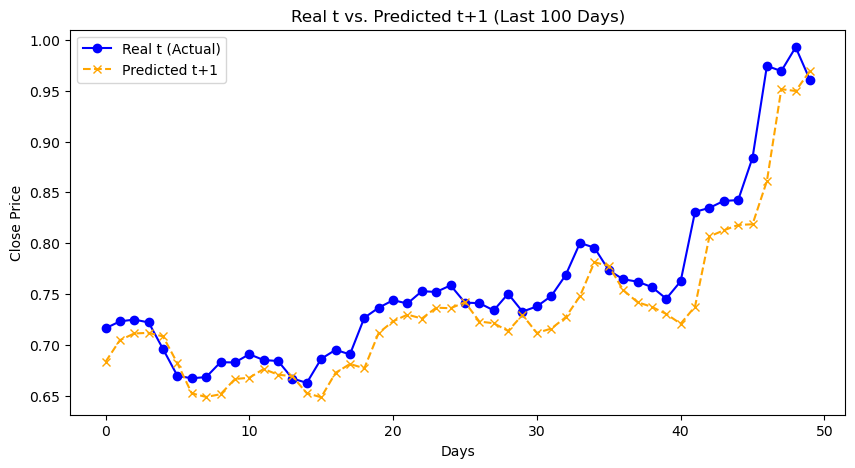

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Extract the real values at `t` and align them with the `t+1` predictions
t_values_real = y_test[:-1, 0]  # Real values at `t`, excluding the last one to align with `t+1` predictions
t_plus_1_predictions_aligned = predictions[1:, 0]  # Skip the first prediction to align with `t` values

# Select the last 100 values for both aligned real and predicted series
t_values_real_last_100 = t_values_real[-50:]
t_plus_1_predictions_aligned_last_100 = t_plus_1_predictions_aligned[-50:]

# Calculate MSE and RMSE
mse = mean_squared_error(t_values_real_last_100, t_plus_1_predictions_aligned_last_100)
rmse = np.sqrt(mse)

# Print MSE and RMSE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting Real t values vs. Predicted t+1 values for the last 100 days
plt.figure(figsize=(10, 5))
plt.plot(t_values_real_last_100, label='Real t (Actual)', color='blue', marker='o')
plt.plot(t_plus_1_predictions_aligned_last_100, label='Predicted t+1', color='orange', linestyle='dashed', marker='x')
plt.title('Real t vs. Predicted t+1 (Last 100 Days)')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### 6. Backtesting

In [79]:
from keras.models import load_model
import joblib
import numpy as np
import pandas as pd

# Paths for saved model and scaler
model_save_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_model_t1_2var_train_val.h5"
scaler_path = r"C:\Users\46704\Desktop\Bitcoin\data\bitcoin_scaler_close.pkl"

# Load the trained model
model = load_model(model_save_path)

# Load the scaler (e.g., MinMaxScaler)
scaler = joblib.load(scaler_path)

# 2. Backtesting parameters
initial_balance = 10000  # Initial capital in USD
balance = initial_balance
position = 0  # No initial position (not holding any Bitcoin)
backtest_results = []

# Ensure the feature matrix `X` and target prices are properly prepared
# Assume `X` is scaled and ready for input, and `target` is the original target prices (scaled)
batch_size = 64  # Experiment with batch size for optimal performance
time_step = X.shape[1]  # Assuming `time_step` corresponds to the input sequence length
start_idx = 0
end_idx = len(X) - 1  # Ensure this aligns with the feature dataset's size

# Backtest loop
for i in range(start_idx, end_idx, batch_size):
    batch_X = X[i:i + batch_size]  # Get batch of inputs
    batch_predictions = model.predict(batch_X)  # Predict prices for the batch

    # Unscale the predictions
    batch_predictions_unscaled = scaler.inverse_transform(batch_predictions)

    # Process each prediction in the batch
    for j in range(len(batch_predictions_unscaled)):
        idx = i + j
        if idx >= len(target) - 1:  # Avoid going out of bounds
            break

        # Unscale the current and next target prices
        current_price = scaler.inverse_transform([[target.iloc[idx]]])[0][0]
        next_price = scaler.inverse_transform([[target.iloc[idx + 1]]])[0][0]

        # Buy/sell/hold logic
        if batch_predictions_unscaled[j][0] > current_price and position == 0:  # Buy signal
            position = balance / current_price
            balance = 0
            action = 'Buy'
        elif batch_predictions_unscaled[j][0] < current_price and position > 0:  # Sell signal
            balance = position * current_price
            position = 0
            action = 'Sell'
        else:
            action = 'Hold'

        # Track the results
        backtest_results.append({
            'Date': data_2024.iloc[idx + time_step]['Date'],
            'Price': current_price,
            'Prediction': batch_predictions_unscaled[j][0],
            'Balance': balance,
            'Position': position,
            'Action': action
        })

# Convert backtest results into a DataFrame
backtest_df = pd.DataFrame(backtest_results)

# 4. Evaluate performance
final_balance = balance if position == 0 else position * scaler.inverse_transform([[target.iloc[-1]]])[0][0]
total_profit = final_balance - initial_balance
percent_profit = (total_profit / initial_balance) * 100

print(f"Initial Balance: ${initial_balance}")
print(f"Final Balance: ${final_balance}")
print(f"Total Profit: ${total_profit}")
print(f"Percentage Profit: {percent_profit:.2f}%")

# Adjust target slicing to match predictions
adjusted_target = target.iloc[time_step:len(backtest_df) + time_step]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Initial Balance: $10000
Final Balance: $46385.0067140073
Total Profit: $36385.0067140073
Percentage Profit: 363.85%


In [80]:
# Display more rows in the DataFrame output
pd.set_option('display.max_rows', None)  # This will display all rows

# Now print the transactions without truncation
print("Transactions:")
print(backtest_df[['Date', 'Action', 'Price', 'Prediction', 'Balance', 'Position']])

# Reset to default behavior after printing (if necessary)
pd.reset_option('display.max_rows')

Transactions:
          Date Action     Price    Prediction       Balance  Position
0   2024-01-11    Buy  44122.03  46148.542969      0.000000  0.226644
1   2024-01-12   Hold  44957.63  46744.964844      0.000000  0.226644
2   2024-01-13   Hold  42818.03  46473.949219      0.000000  0.226644
3   2024-01-14   Sell  44188.15  43140.242188  10014.985711  0.000000
4   2024-01-15   Hold  44112.11  43208.625000  10014.985711  0.000000
5   2024-01-16   Hold  43941.78  41949.296875  10014.985711  0.000000
6   2024-01-17   Hold  43850.46  42747.230469  10014.985711  0.000000
7   2024-01-18   Hold  46900.01  43310.269531  10014.985711  0.000000
8   2024-01-19   Hold  46082.08  43025.953125  10014.985711  0.000000
9   2024-01-20   Hold  46564.21  41588.343750  10014.985711  0.000000
10  2024-01-21   Hold  46356.96  41917.464844  10014.985711  0.000000
11  2024-01-22   Hold  42896.05  41856.546875  10014.985711  0.000000
12  2024-01-23   Hold  42840.02  41708.632812  10014.985711  0.000000
13  20